### Step 1: Move the downloaded files to GCS

1) Open CMD
2) Navigate to the folder "D:/data"
3) Run the below command 

`gsutil -m cp -r pq/ gs://dtc_data_lake_composed-sun-375018/pq`  (Change the bucket name accordingly)

- The -m option is for enabling multithreaded upload in order to speed the process
- cp is for copying files
- -r stands for recursive; it's used to state that the contents of the local folder are to be uploaded. For single files this option isn't needed

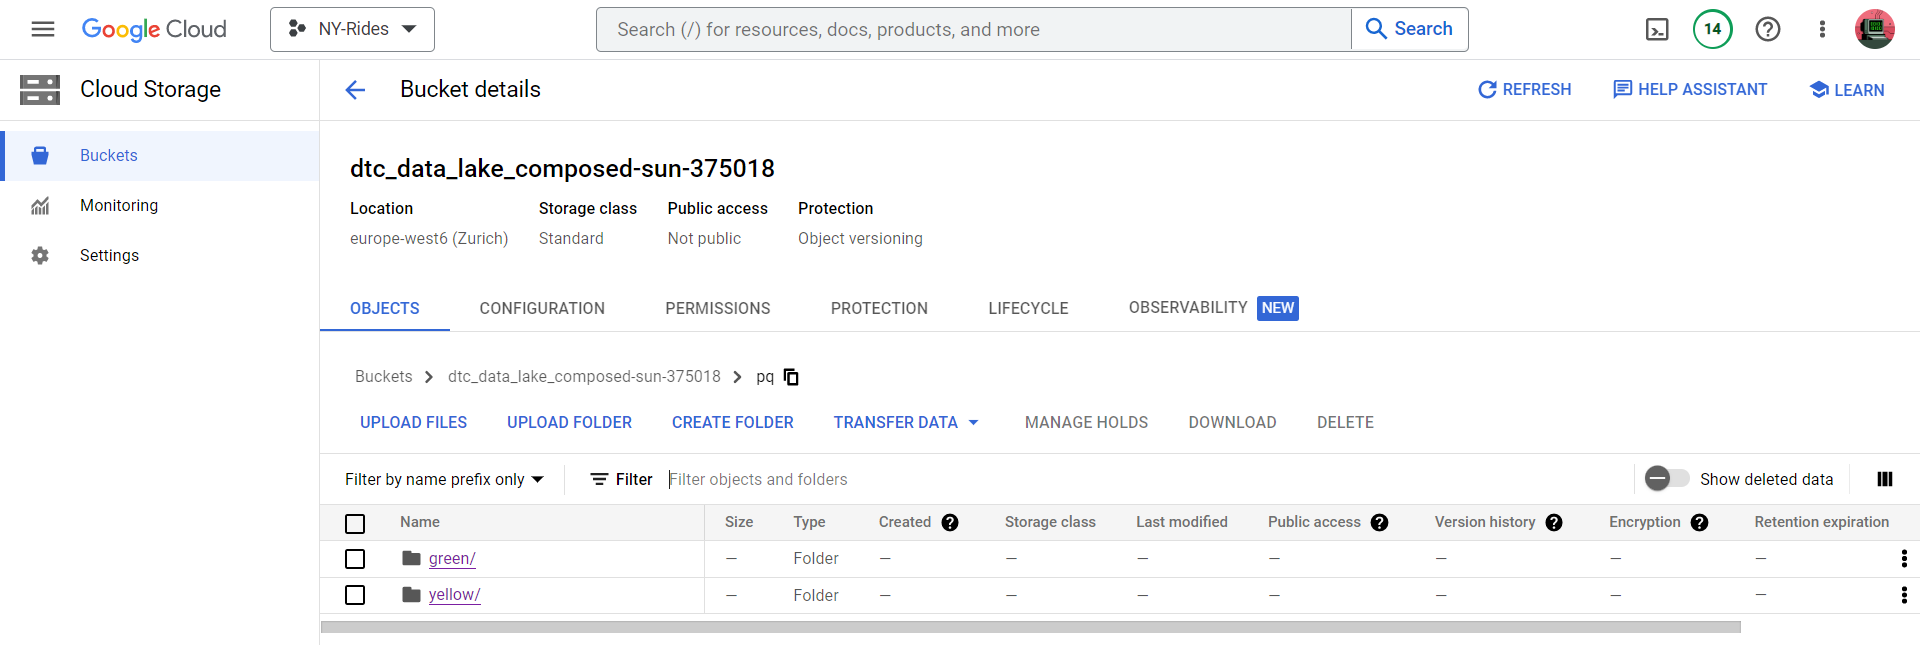


### Step 2: Download hadoop jar file

Do the below

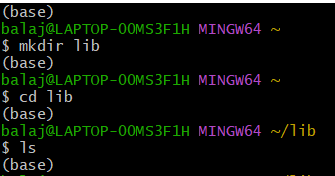

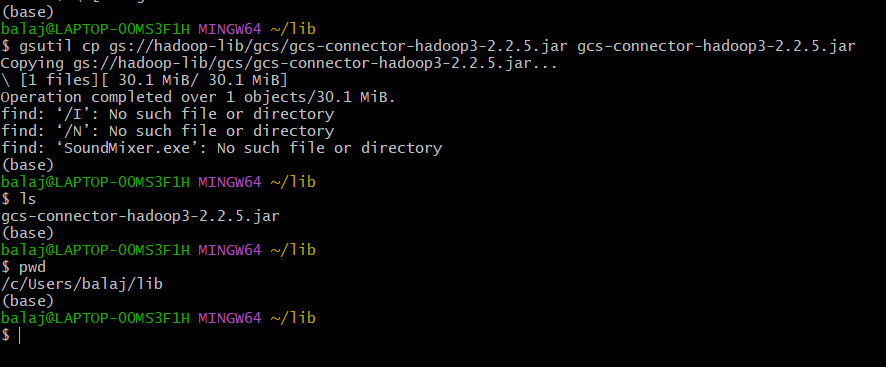


### Step 3: Configure Spark with the GCS connector

Run the below codes

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.context import SparkContext

In [2]:
credentials_location = './.gc/ny_rides.json' # Change accordingly

conf = SparkConf() \
    .setMaster('local[*]') \
    .setAppName('test') \
    .set("spark.jars", "./lib/gcs-connector-hadoop3-2.2.5.jar") \  # Change accordingly
    .set("spark.hadoop.google.cloud.auth.service.account.enable", "true") \
    .set("spark.hadoop.google.cloud.auth.service.account.json.keyfile", credentials_location)

In [3]:
sc = SparkContext(conf=conf)

hadoop_conf = sc._jsc.hadoopConfiguration()

hadoop_conf.set("fs.AbstractFileSystem.gs.impl",  "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFS")
hadoop_conf.set("fs.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem")
hadoop_conf.set("fs.gs.auth.service.account.json.keyfile", credentials_location)
hadoop_conf.set("fs.gs.auth.service.account.enable", "true")

In [4]:
spark = SparkSession.builder \
    .config(conf=sc.getConf()) \
    .getOrCreate()

In [5]:
df_green = spark.read.parquet('gs://dtc_data_lake_composed-sun-375018/pq/green/*/*') # Change accordingly

In [6]:
df_green.count()

2304517